In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import utils
import matplotlib.pyplot as plt

sns.set_theme()

In [2]:
tickers = ["HDFCAMC", "CUMMINSIND", "MCDOWELL-N", "LTTS", "HCLTECH", "DRREDDY"]

<Axes: >

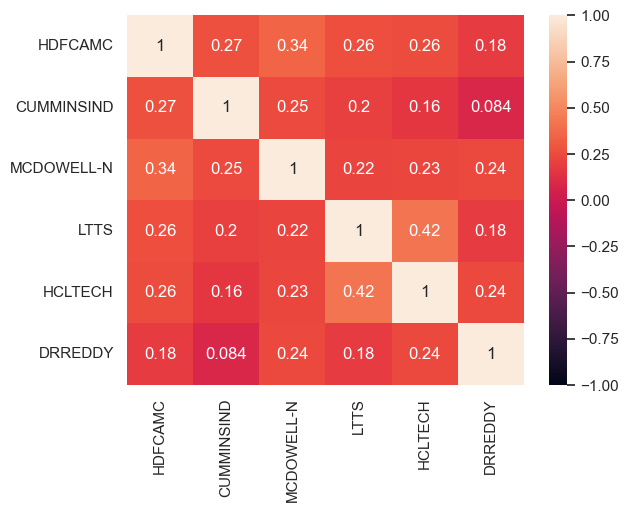

In [3]:
ret = utils.get_multiple_returns(tickers)
sns.heatmap(ret.corr(), vmin=-1, vmax=1, annot=True)

<Axes: xlabel='Date', ylabel='Returns'>

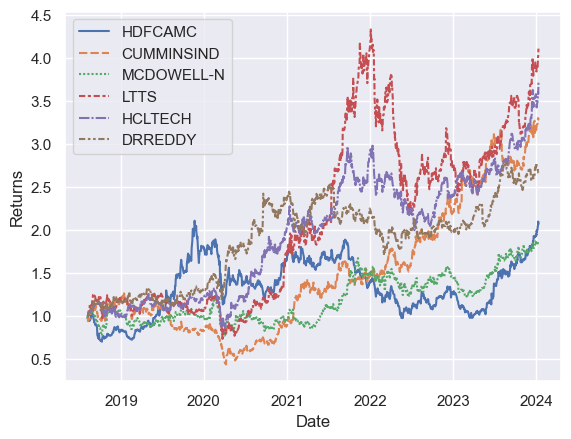

In [4]:
plt.ylabel("Returns")
sns.lineplot((1 + ret).cumprod())

# Minimum Variance Portfolio


In [5]:
po = utils.PortfolioOptimizer(tickers=tickers, rf=0.0721, tangency=False)
w_min_var = po.optimize_portfolio()

df_w_min_var = utils.weights_to_pd(w_min_var, tickers)
df_w_min_var

ic| 'Fetching ticker data'
ic| 'Running GA'


,w
HDFCAMC,0.107135
CUMMINSIND,0.182005
MCDOWELL-N,0.125196
LTTS,0.042496
HCLTECH,0.220839
DRREDDY,0.322328


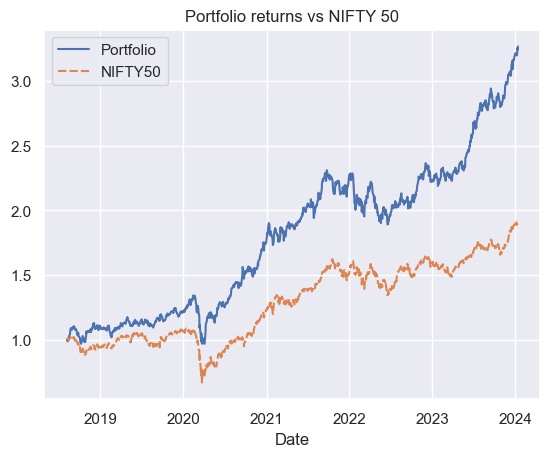

In [6]:
def plot_against_nifty(ret: pd.DataFrame, w: np.ndarray, filename):
    plt.title("Portfolio returns vs NIFTY 50")
    df = pd.merge(
        (1 + ret @ w).cumprod(),
        utils.get_returns("^NSEI", index=True),
        on="Date",
        how="inner",
    ).rename(columns={0: "Portfolio", "^NSEI": "NIFTY50"})
    df["NIFTY50"] = (1 + df["NIFTY50"]).cumprod()
    df.index = df["Date"]
    df = df.drop(columns=["Date"])
    sns.lineplot(df)
    plt.savefig(filename)


plot_against_nifty(ret, w_min_var, "../res/min_var.png")

## Export to Excel


In [7]:
writer = pd.ExcelWriter("../res/report.xlsx", engine="xlsxwriter")
po.portfolio_to_excel(writer, "Minimum Variance Portfolio", "../res/min_var.png")

# Equal Weight Portfolio


In [8]:
w_equ = np.ones((len(tickers), 1)) / len(tickers)
utils.weights_to_pd(w_equ, tickers)

,w
HDFCAMC,0.166667
CUMMINSIND,0.166667
MCDOWELL-N,0.166667
LTTS,0.166667
HCLTECH,0.166667
DRREDDY,0.166667


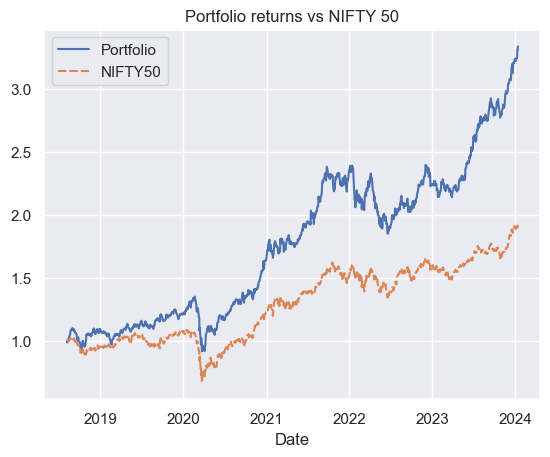

In [9]:
plot_against_nifty(ret, w_equ, "../res/equal.png")

In [10]:
po_equ = utils.PortfolioOptimizer(tickers=tickers, rf=0.0721, tangency=False)
po_equ.w = w_equ

ic| 'Fetching ticker data'


In [11]:
po.sharpe()

1.1108197686733088

In [12]:
po_equ.portfolio_to_excel(writer, "Equal Weight Portfolio", "../res/equal.png")
writer.close()